<a href="https://colab.research.google.com/github/hakim-cyber/Comp-Science-for-physics-and-chemistry/blob/main/PW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

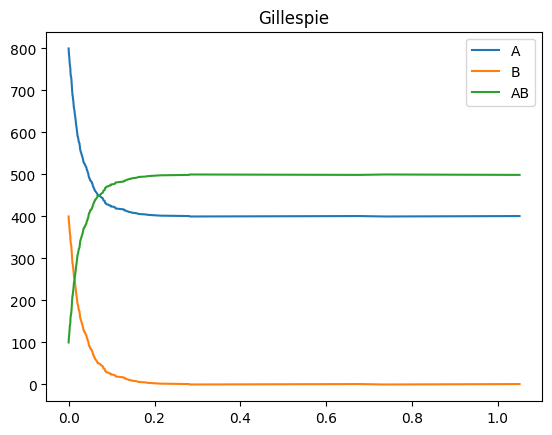

ratio (A*B / AB): 0.09999999999999999


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# consts
kf = 0.05
kr = 0.005
A0, B0, AB0 = 800, 400, 100
t_max = 1.0

def gillespie(kf, kr, A0, B0, AB0, t_max):
    t = 0
    A, B, AB = A0, B0, AB0
    times = [t]
    A_hist, B_hist, AB_hist = [A], [B], [AB]

    while t < t_max:
        r1 = kf * A * B
        r2 = kr * AB
        r_total = r1 + r2

        if r_total == 0:
            break

        tau = np.random.exponential(1 / r_total)

        if np.random.rand() < r1 / r_total:
            A -= 1
            B -= 1
            AB += 1

        else:

            A += 1
            B += 1
            AB -= 1

        t += tau
        times.append(t)
        A_hist.append(A)
        B_hist.append(B)
        AB_hist.append(AB)

    return np.array(times), np.array(A_hist), np.array(B_hist), np.array(AB_hist)


times, A_hist, B_hist, AB_hist = gillespie(kf, kr, A0, B0, AB0, t_max)


plt.plot(times, A_hist, label="A")
plt.plot(times, B_hist, label="B")
plt.plot(times, AB_hist, label="AB")
plt.legend()
plt.title("Gillespie")
plt.show()


ratio = kr / kf
print("ratio (A*B / AB):", ratio)


ex2


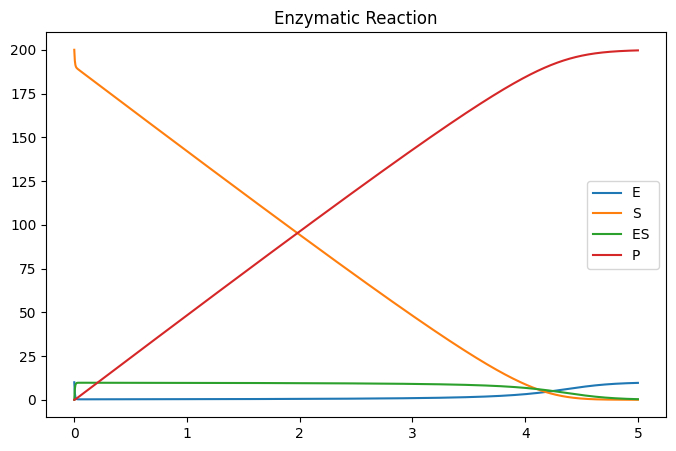

In [5]:
from scipy.integrate import odeint

def enzyme_ode(y, t, k1, km1, k2):
    E, S, ES, P = y
    dE = -k1*E*S + km1*ES + k2*ES
    dS = -k1*E*S + km1*ES
    dES = k1*E*S - km1*ES - k2*ES
    dP = k2*ES
    return [dE, dS, dES, dP]

# inint
y0 = [10, 200, 0, 0]
t = np.linspace(0, 5, 1000)
sol = odeint(enzyme_ode, y0, t, args=(1, 0.01, 5))


plt.figure(figsize=(8,5))
plt.plot(t, sol[:,0], label="E")
plt.plot(t, sol[:,1], label="S")
plt.plot(t, sol[:,2], label="ES ")
plt.plot(t, sol[:,3], label="P ")

plt.legend()
plt.title("Enzymatic Reaction")
plt.show()


ex3


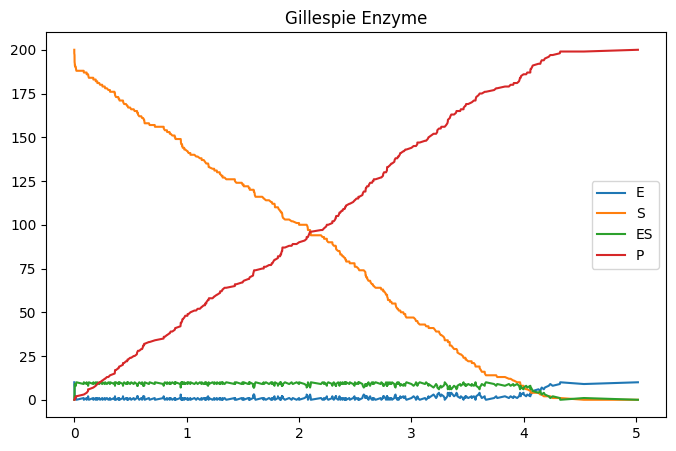

In [7]:
def gillespie_enzyme(k1, km1, k2, E0, S0, ES0, P0, t_max):
    t = 0
    E, S, ES, P = E0, S0, ES0, P0
    times = [t]
    E_hist, S_hist, ES_hist, P_hist = [E], [S], [ES], [P]

    while t < t_max:
        r1 = k1 * E * S

        r2 = km1 * ES
        r3 = k2 * ES

        r_total = r1 + r2 + r3
        if r_total == 0:
            break



        tau = np.random.exponential(1 / r_total)

        r = np.random.rand() * r_total


        if r < r1:
            E -= 1; S -= 1; ES += 1  # E+S -> ES

        elif r < r1 + r2:
            E += 1; S += 1; ES -= 1  # ES -> E+S
        else:
            E += 1; ES -= 1; P += 1  # ES -> E+P


        t += tau
        times.append(t)
        E_hist.append(E)
        S_hist.append(S)
        ES_hist.append(ES)
        P_hist.append(P)

    return np.array(times), np.array(E_hist), np.array(S_hist), np.array(ES_hist), np.array(P_hist)


times, E_hist, S_hist, ES_hist, P_hist = gillespie_enzyme(1, 0.01, 5, 10, 200, 0, 0, 5)


plt.figure(figsize=(8,5))
plt.plot(times, E_hist, label="E")
plt.plot(times, S_hist, label="S")
plt.plot(times, ES_hist, label="ES")
plt.plot(times, P_hist, label="P")

plt.legend()
plt.title("Gillespie Enzyme")
plt.show()
